In [4]:
!pip install umap-learn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import fetch_openml

Carregar o Conjunto de Dados: Usamos fetch_openml para carregar o conjunto de dados MNIST.

In [6]:


# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)




/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
# Selecionar uma amostra menor para UMAP devido ao custo computacional
sample_size = 1000
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X.iloc[indices]
y_sample = y[indices]



In [8]:
# Aplicar UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_sample)



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


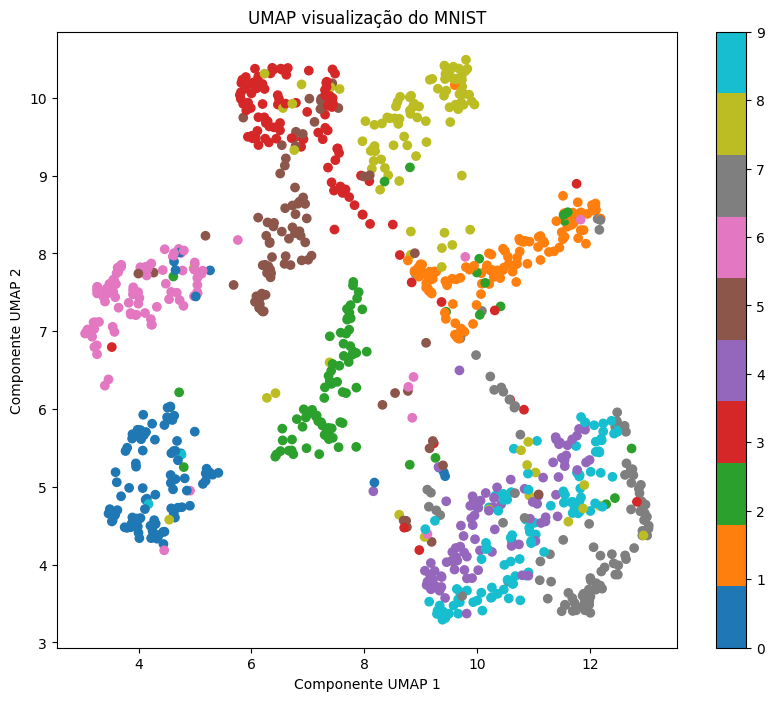

In [9]:
# Visualizar os resultados
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10')
plt.colorbar(scatter, ticks=range(10))
plt.title('UMAP visualização do MNIST')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.show()